In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)

In [ ]:
from funcat import *
from pytdx import *
from tushare import *
from rqalpha import *
#from jaqs import *
#from abupy import *
#from quantaxis import *
#from hikyuu import *

In [ ]:
import time
import datetime
n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
#print (time.strftime("20%y-%m-%d")) ## dd/mm/yyyy格式，输出当日日期
#print (time.strftime("20%y%m%d"))
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前一天日期
i = datetime.datetime.now()#当前日期
n4 = ("%s%s%s" % (i.year, i.month, i.day) )
n5 = ("%s" % i.isoformat() )
print ("读取当日时间格式n1",n1) #当日时间格式：yyyy-mm-dd
print ("读取当日时间格式n2",n2) #当日时间格式：yyyymmdd
print ("读取前一日时间格式n3",n3) #前日时间格式：yyyy-mm-dd
print ("读取当日时间格式n4",n4) #当日时间格式：yyyymmdd
print ("读取当日时间格式n5",n5) #当日时间格式：yyyy-mm-dd:...
n8="20180201"#开始时间
print ("手动设定选股开始时间格式n8",n8)
n9="20180201"#结束时间
print ("手动设定选股结束时间格式n9",n9)
n10="20160101"#设定起始时间
print ("手动设定数据更新设定起始时间格式n10",n10)
x1="000001.XSHG"
x2="603377.XSHG"
print ("设定股票代码",x1,x2)

In [4]:
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend

backend = "tushare"

if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())

set_start_date(n10)
S(x1)  # 设置当前关注股票
T(n9)   # 设置当前观察日期

In [5]:
 #import RQAlpha update_bundle

In [6]:
print ("打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("打印60日均线",MA(C, 60))  # 打印60日均线
print ("判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("30日最高价",HHV(H, 30))  # 30日最高价
print ("最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线


打印 开盘 最高 最低 收盘 成交量 3478.67 3495.09 3424.42 3446.98 260504707.0
当天涨幅 -0.00972469209929816
打印60日均线 3380.675999999998
判断收盘价是否大于60日均线 True
30日最高价 3587.03
最近30日，收盘价 Close 大于60日均线的天数 22
10日均线上穿 False
最近10天收阳线的天数 6
最近60天K线实体的最高价 3563.64
5日均线上穿10日均线 False


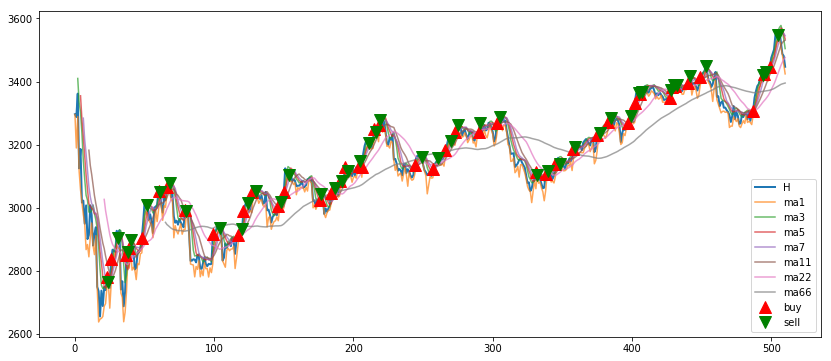

In [7]:
#0x02 均线金叉死叉
ax = plt.subplot()
ma1 = MA(L,1)
ma3 = MA(H,3)
ma5 = MA(H,5)
ma7 = MA(H,7)
ma11 = MA(H,11)
ma22 = MA(H,22)
ma66 = MA(H,66)
buy_signal = CROSS(ma1, ma7)
sell_signal = CROSS(ma7, ma1)
plt.plot(C.series, label="H", linewidth=2)
plt.plot(ma1.series, label="ma1", alpha=0.7)
plt.plot(ma3.series, label="ma3", alpha=0.7)
plt.plot(ma5.series, label="ma5", alpha=0.7)
plt.plot(ma7.series, label="ma7", alpha=0.7)
plt.plot(ma11.series, label="ma11", alpha=0.7)
plt.plot(ma22.series, label="ma22", alpha=0.7)
plt.plot(ma66.series, label="ma66", alpha=0.7)
plt.plot(np.where(buy_signal.series)[0], C.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], C.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

79.85767031592606 82.86447507142722 73.84406080492374


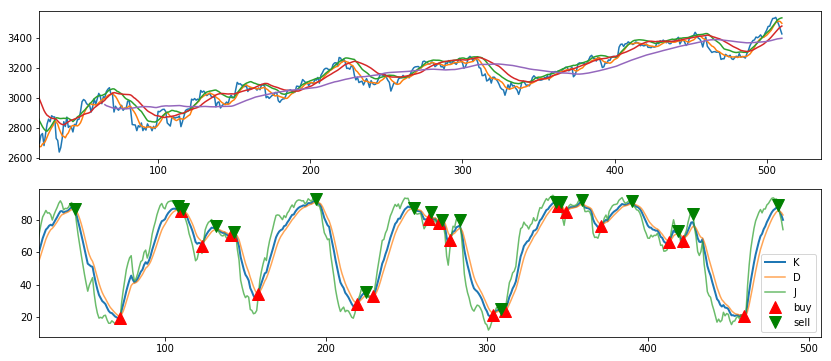

In [8]:
N, M1, M2 = 27, 9, 3
RSV = (CLOSE - LLV(LOW, N)) / (HHV(HIGH, N) - LLV(LOW, N)) * 100
K = EMA(RSV, (M1 * 2 - 1))
D = EMA(K, (M2 * 2 - 1))
J = K * 3 - D * 2
print(K, D, J)
f, (ax1, ax2,) = plt.subplots(2, 1)
ax1.plot(L.series, label="L")
ax1.plot(MA(L, 7).series, label="ma7")
ax1.plot(MA(H, 11).series, label="ma11")
ax1.plot(MA(H, 22).series, label="ma22")
ax1.plot(MA(H, 66).series, label="ma66")
ax1.set_xlim(22)
ax2.plot(K.series, label="K", linewidth=2)
ax2.plot(D.series, label="D", alpha=0.7)
ax2.plot(J.series, label="J", alpha=0.7)
ax2.set_xlim(22)
buy_signal = CROSS(J, K)
sell_signal = CROSS(K, J)
plt.plot(np.where(buy_signal.series)[0], K.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], J.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()


140.35160000000133 119.03872000000092


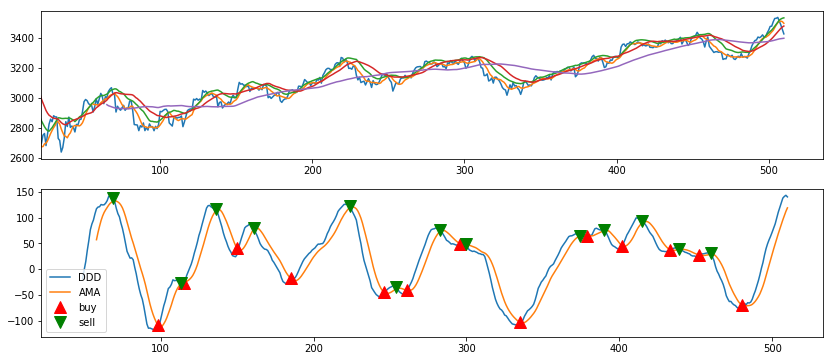

In [ ]:
#0x03 DMA指标（Different of Moving Average）DMA指标（Different of Moving Average）
#又叫平行线差指标，是目前股市分析技术指标中的一种中短期指标，它常用于大盘指数和个股的研判。
M1 = 10
M2 = 50
M3 = 10
DDD = MA(CLOSE, M1) - MA(CLOSE, M2)
AMA = MA(DDD, M3)
print(DDD, AMA)
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(L.series, label="L")
ax1.plot(MA(L, 7).series, label="ma7")
ax1.plot(MA(H, 11).series, label="ma11")
ax1.plot(MA(H, 22).series, label="ma22")
ax1.plot(MA(H, 66).series, label="ma66")
ax1.set_xlim(22)
ax2.plot(DDD.series, label="DDD")
ax2.plot(AMA.series, label="AMA")
ax2.set_xlim(22)
buy_signal = CROSS(DDD, AMA)
sell_signal = CROSS(AMA, DDD)
plt.plot(np.where(buy_signal.series)[0], AMA.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], DDD.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()


In [ ]:
# 选出涨停股
select(
    lambda : C / C[1] - 1 >= 0.0995,
    start_date=(n8),
	end_date=(n9),
)

lambda : C / C[1] - 1 >= 0.0995,
[20180201]
20180201 000736.XSHE 000736.XSHE[中交地产]
20180201 002863.XSHE 002863.XSHE[今飞凯达]
20180201 002893.XSHE 002893.XSHE[华通热力]


In [ ]:
# 选出最近30天K线实体最高价最低价差7%以内，最近100天K线实体最高价最低价差25%以内，
# 最近10天，收盘价大于60日均线的天数大于3天
select(
    lambda : ((HHV(MAX(C, O), 30) / LLV(MIN(C, O), 30) - 1 < 0.07)
              & (HHV(MAX(C, O), 100) / LLV(MIN(C, O), 100) - 1 > 0.25)
              & (COUNT(C > MA(C, 60), 10) > 3)
             ),
    start_date=(n8),
	end_date=(n9),
)

In [ ]:
# 选出最近3天每天的成交量小于20日成交量均线，最近3天最低价低于20日均线，最高价高于20日均线
# 自定义选股回调函数
def callback(date, order_book_id, symbol):
    print("Cool, 在", date, "选出", order_book_id, symbol)

    
select(
    lambda : (EVERY(V < MA(V, 20) / 2, 3) & EVERY(L < MA(C, 20), 3) & EVERY(H > MA(C, 20), 3)),
    start_date=(n8),
	end_date=(n9),
    callback=callback,
)